# SemSeg Pytorch Library

In [2]:
import segmentation_models_pytorch as smp
import torchvision.datasets as D
import matplotlib.pyplot as plt
import torch
import numpy as np

In [4]:
model = smp.Unet(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=19,                      # model output channels (number of classes in your dataset)
)

In [5]:
dataset = D.Cityscapes('HRNet/data/cityscapes', split="val", target_type='semantic')

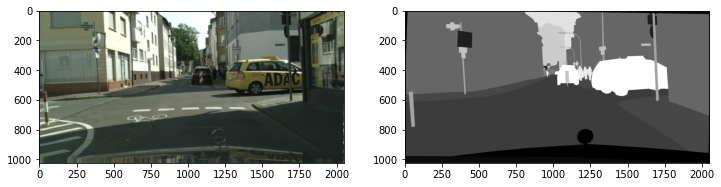

In [6]:
fig,ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].imshow(dataset[0][0])
ax[1].imshow(dataset[0][1], cmap='gray')

In [7]:
test = torch.Tensor(np.array([np.array(dataset[0][0])]))
test = torch.permute(test, (0, 3, 1, 2))
y = model(test)

In [8]:
y.shape

torch.Size([1, 19, 1024, 2048])

In [9]:
colors_data = [ [0,  0,  0],
          [128, 64,128],
          [244, 35,232],
          [70, 70, 70],
          [102,102,156],
          [190,153,153],
          [153,153,153],
          [250,170, 30],
          [250,170, 30],
          [107,142, 35],
          [152,251,152],
          [ 70,130,180],
          [220, 20, 60],
          [255,  0,  0],
          [ 0,  0,142],
          [  0,  0, 70],
          [  0,  0, 70],
          [  0, 80,100],
          [  0,  0,230],
          [119, 11, 32] ]

In [13]:
def convert_to_RGB(y, display_idx=0):
    """
    Identifies the class by taking the argmax across values.
    Replaces the class id by 
    """
    # n_classes = 19
    n_classes = y.shape[1]
    
    colors = np.array(colors_data[:n_classes])
    print(f"Using {len(colors)} classes.")
    
    channels = y.permute(0, 2, 3, 1)
    idtfd = channels.argmax(dim=3).numpy()

    print("Showing image 0")
    imgs = colors[idtfd]
    plt.imshow(imgs[0])
    
    return imgs, idtfd

Using 19 classes.
Showing image 0


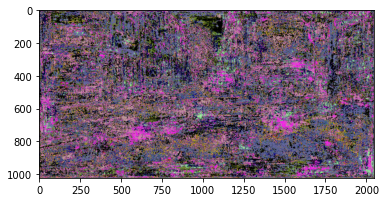

In [14]:
_, _ = convert_to_RGB(y)

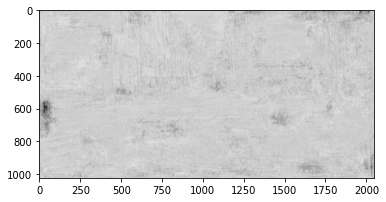

In [34]:
y2 = np.mean(y[0].detach().numpy(), axis=0)
plt.imshow(y2, cmap='gray')